# A Pace/HR distribution visualization

Analysis by Jeremy Mann

Made a visualization class to plot the (empirical) distribution of pace vs  

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

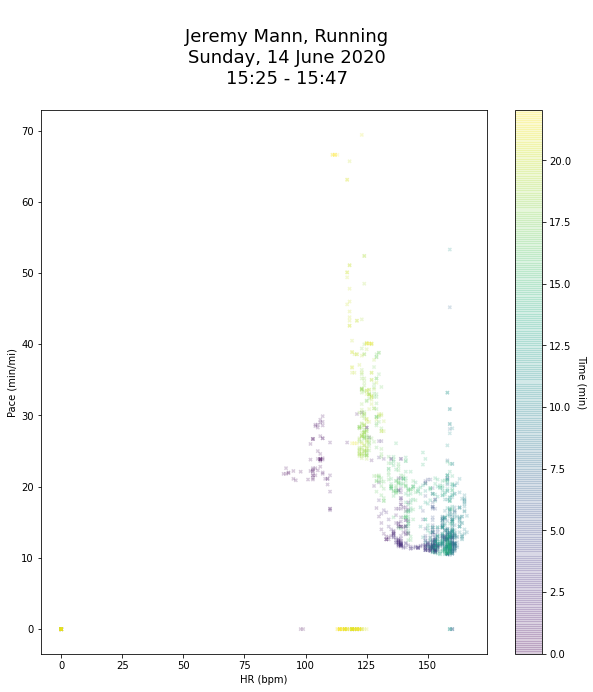

In [129]:
class pace_hr_dist_figure():
    def __init__(self, data_filename):
        self.data_filename = data_filename
        self.df = self.load_dataframe()
        self.fig = self.make_figure()
    
    def load_dataframe(self):
        data_filepath = os.path.join('..', 'data' , 'wrangled_data', self.data_filename)
        df = pd.read_csv(data_filepath)
        return df

    def make_figure(self,figsize = (10, 10), saturation_level = .2, marker_size = 10, title_size = 18, cmap = 'viridis'):
        '''
        Makes a scatterplot of pace vs heart rate of a session
        '''
        fig = plt.figure(figsize = figsize)
        ax = plt.axes()

        colors = np.arange(0, self.df.shape[0], 1)/60
        marker_sizes = np.full(shape = self.df.shape[0], fill_value = marker_size)

        plt.scatter(x = 'HR (bpm)', y = 'Pace (min/mi)', data = self.df,
                    c=colors, alpha = saturation_level, cmap = cmap, 
                    sizes = marker_sizes, marker = 'x')
                
        cbar = plt.colorbar()
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Time (min)', rotation=270)

        plt.xlabel('HR (bpm)')
        plt.ylabel('Pace (min/mi)')
        plt.title(self.make_title(), fontsize = title_size)

        return fig
    
    def make_title(self):
        '''
        Makes the title. 
        
        Example:
        Running, Jeremy Mann
        Monday November 23, 2020 
        Start Time - End Time
        '''
        filename_terms = self.data_filename.replace('.', '_').split('_')
        
        activity = filename_terms[2].title()
        
        name = '{} {}'.format(filename_terms[-3], filename_terms[-2]).title()
        
        datetime_format  = '%Y-%m-%d %H:%M:%S'
        start_datetime = datetime.strptime(self.df.loc[0, 'Time'], datetime_format)
        start_time = start_datetime.strftime('%H:%M')
        last_entry = self.df.shape[0]-1
        end_datetime = datetime.strptime(self.df.loc[last_entry, 'Time'], datetime_format)
        end_time = end_datetime.strftime('%H:%M')
        
        date = start_datetime.strftime('%A, %d %B %Y')


        
        title = '''
        {}, {}
        {}
        {} - {}
        '''.format(name, activity, date, start_time, end_time)
        
        return title
    
    def save_figure(self):
        '''
        Saves the figure into the figures folder
        '''
        data_terms = self.data_filename.split('.')[0]
        figure_name = data_terms + '_figure.png'
        figure_filepath = os.path.join('..', 'figures', figure_name)
        self.fig.savefig(figure_filepath)
        
        

data_filename = '2020-06-14_15:25_running_jeremy_mann.csv'
figure = pace_hr_dist_figure(data_filename, )
figure.save_figure()